<center><h1>Testing and Documentation Notebook for Cellular Automaton Using a Custom Class Object</h1></center>
<p>This document is for testing of a cellular automaton.  It is implemented using a custom class, cell.  This class creates an object which has the functionality to calculate its state in the next time step.  For the cellular automaton simulation, we will create a two dimensional list of these objects.  This will form our computational grid.</p>
<h2>Initialization</h2>

In [8]:
from CellularAutomaton import *
from IPython.display import display
import inspect

from math import *
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

from matplotlib import animation
matplotlib.rc('animation', html='html5')

goldenratio=1/2*(1+sqrt(5))
fsx=7
fsy=fsx/goldenratio

def InfoDocString(function):
    """Function to return function definition and document string."""
    
    code = inspect.getsource(function)
    docstring = inspect.getdoc(function)
    return code[0:code.find(':')+1].lstrip() +'\n' + docstring

<h3>Functions to help with testing</h3>
<p>Note:  These functions make use of the data being passed through a 2D list of cells named grid.</p>

In [9]:
def print_grid():
    print(grid[0][0], grid[0][1], grid[0][2],'\n',
    grid[1][0], grid[1][1], grid[1][2],'\n',
    grid[2][0], grid[2][1], grid[2][2])

In [10]:
def u():
    for row in grid:
        for c in row:
            c.set_old_state()
    for row in grid:
        for c in row:
            c.update()
    gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
    print_grid()

<h3>Functions for Making Animations

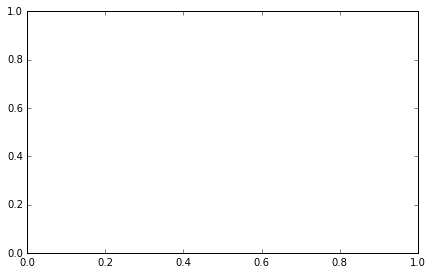

In [11]:
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy))

In [12]:
def uf():
    for row in grid:
        for c in row:
            c.set_old_state()
    for row in grid:
        for c in row:
            c.update()
    gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
    MyAxes.matshow(gridvalues)
    MyFigure

In [13]:
def af(n):
    uf()

<h2>Cellular Automaton</h2>
<p>Some good reasources for cellular automaton simulations are:
<ul>
<li><a href=http://web.stanford.edu/~cdebs/GameOfLife/>A page</a> describing Conway's Game of Life and the origins of cellular automaton</li>
<li>Well, right now I guess I just have this one link.</li>
</ul></p>
<h2>Python Classes</h2>
<p>Classes enable us to create computer objects which have structure.  They contain variables (called data attributes) and have functions (called methods) which can do stuff.  When an class is first used it creates an 'instance' of the object.  There can be multiple objects from the same class in exestiance at the same time.  The python tutorial does a good job of <a href= https://docs.python.org/3/tutorial/classes.html >explaining classes</a>.</p>
<p>The stucture of the class 'Cell' is described by its document string.</p>

In [14]:
print(InfoDocString(Cell))

class Cell:
Cell is an object for cellular automaton simulations (especially game of life simulations).

The cell object will keep track of its state, neighbors and update itself when update is called.
This object is for the cell only.  It does not create an entire grid, nor can it determine what
its neighbors are.

Class variables:
    These are the same for all instances of the class.

    ProbInitialTrue = 0.5   ->  Used in __init__ to determine if the cell is initialized to
                                True or False.

Instance Variables (or Data Attributes):

    These are unique for each instance of the class.

    .state          ->  In the game of life, this tracks if the cell is 'alive' or 'dead.'
    .value          ->  Python expects this attribute to be returned in various cases.
    Neighbors[]     ->  List of cell neighbors.  This list is used by update to know where to
                        check values.  This list must be set before calls to update.
                

<h2>Test a 3 x 3 Behavior</h2>

1 0 1 
 1 0 1 
 1 1 0


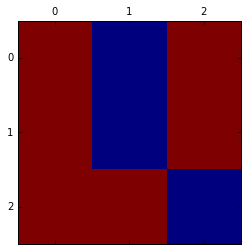

In [26]:
rows = 3
columns = 3
grid=[[Cell() for x in range(columns)] for y in range(rows)]
#Cell sets its state randomly if no state is passed.
SetNeighbors(grid, columns, rows)
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure
print_grid()

In [31]:
repr(grid[0][0])

'<CellularAutomaton.Cell object at 0x00000000086D0BA8>'

In [27]:
u()

1 0 1 
 1 0 1 
 1 1 0


In [28]:
u()

1 0 1 
 1 0 1 
 1 1 0


In [21]:
u()

1 1 1 
 1 1 1 
 1 1 1


In [22]:
u()

0 1 0 
 0 0 1 
 1 0 1


In [23]:
u()

0 1 0 
 0 0 1 
 1 0 1


<h2>Small Grid Animation Test</h2>

In [ ]:
cell.ProbInitialTrue = .1
rows = 25
columns = 50
grid=[[cell() for x in range(columns)] for y in range(rows)]
SetNeighbors(grid, columns, rows)
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure

In [ ]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h2>Glider Example</h2>
<h3>Small Grid Example</h3>

In [ ]:
cell.ProbInitialTrue = 0
rows = 5
columns = 5
grid=[[cell() for x in range(columns)] for y in range(rows)]
SetNeighbors(grid, columns, rows)

grid[0][1].state = True
grid[1][1].state = True
grid[1][2].state = True
grid[2][0].state = True
grid[2][2].state = True

[[grid[y][x].set_value() for x in range(columns)] for y in range(rows)]
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure

In [ ]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 33 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Large Grid Example</h3>

In [ ]:
cell.ProbInitialTrue = 0
rows = 50
columns = 75
grid=[[cell() for x in range(columns)] for y in range(rows)]
SetNeighbors(grid, columns, rows)

grid[0][1].state = True
grid[1][1].state = True
grid[1][2].state = True
grid[2][0].state = True
grid[2][2].state = True

[[grid[y][x].set_value() for x in range(columns)] for y in range(rows)]
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure

In [ ]:
AnimationFrames = 1000  #total number of frames in animation.
DelayBetweenFrames = 20 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h2>Full Game of Life Simulations</h2>
<h3>Simulation 01</h3>

In [ ]:
cell.ProbInitialTrue = .07
rows = 25
columns = 50
grid=[[cell() for x in range(columns)] for y in range(rows)]
SetNeighbors(grid, columns, rows)
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure

In [ ]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<h3>Simulation 02</h3>

In [ ]:
cell.ProbInitialTrue = .051
rows = 25
columns = 50
grid=[[cell() for x in range(columns)] for y in range(rows)]
SetNeighbors(grid, columns, rows)
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure

In [ ]:
AnimationFrames = 100  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

In [ ]:
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation